In [1]:
'''
penalty --> L1 or L2 regularization
C --> 1/lambda (i.e lambda is the tuning parameter in the regularized cost function)
fit_intercept --> 
intercept_scaling --> between 0 to 1. internally it is going to apply Standard Scaler.
                      So no need of doing it explicitly.
class_weight --> dict or balanced
                balanced : To treat the impbalanced data-set by doing upsampling by applying 
                the formula [n_samples / (n_classes * np.bincount(y))]
'''

'\npenalty --> L1 or L2 regularization\nC --> 1/lambda (i.e lambda is the tuning parameter in the regularized cost function)\nfit_intercept --> \nintercept_scaling --> between 0 to 1. internally it is going to apply Standard Scaler.\n                      So no need of doing it explicitly.\nclass_weight --> dict or balanced\n                balanced : To treat the impbalanced data-set by doing upsampling by applying \n                the formula [n_samples / (n_classes * np.bincount(y))]\n'

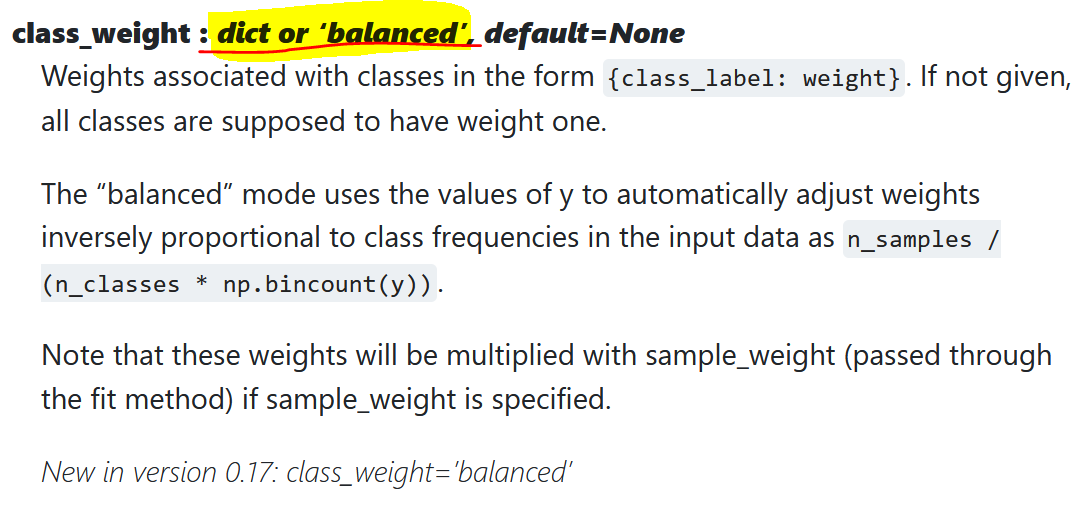

In [2]:
'''
random_state --> 
solver --> lbfgs
max_iter --> default:100 will be updating the coefficient value 100 times
'''

'\nrandom_state --> \nsolver --> lbfgs\nmax_iter --> default:100 will be updating the coefficient value 100 times\n'

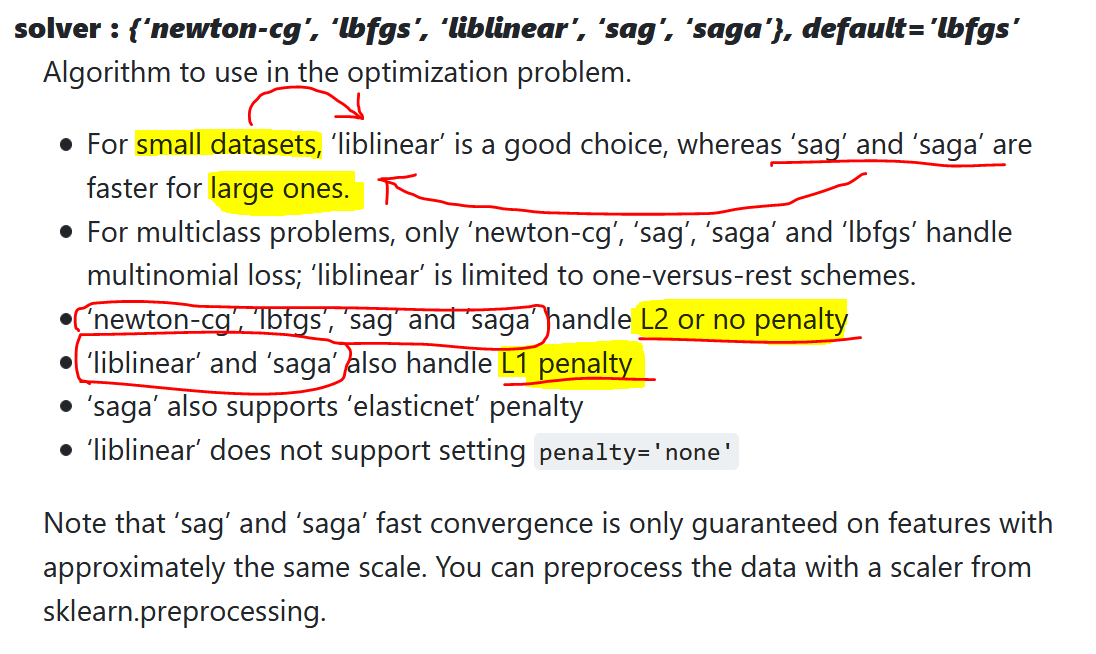

In [3]:
'''
multi_class --> auto for binary classification
'''

'\nmulti_class --> auto for binary classification\n'

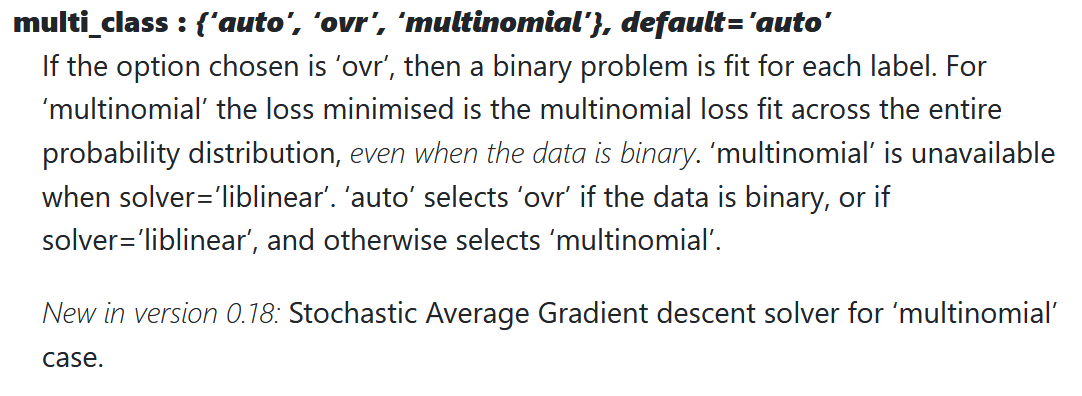

In [4]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = load_breast_cancer()
df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
df['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
df['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
## independent features
x = pd.DataFrame(df['data'] , columns = df['feature_names'])
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
## dependent features
y = pd.DataFrame(df['target'] , columns=['Target'])
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [10]:
## this is partially an imbalanced data-set
y.value_counts()

Target
1         357
0         212
dtype: int64

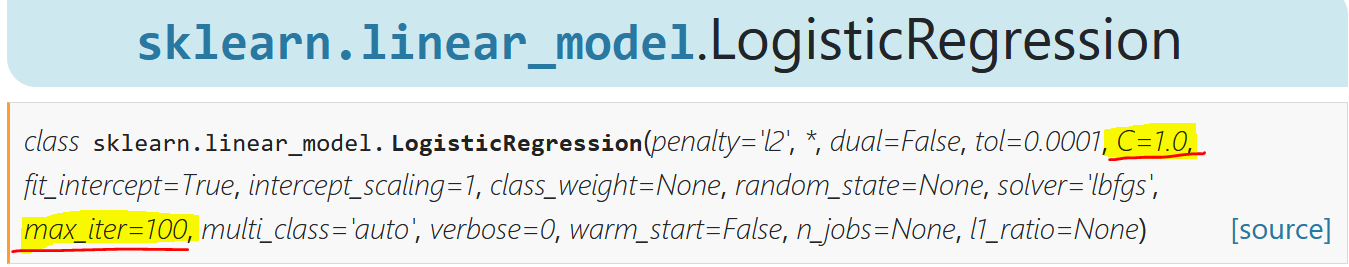

In [11]:
## for the sake of hyper parameter tuning
params = [ {'C'       :[10**-4 , 10**-2 , 10**0 , 10**2 , 10**4]} , 
           {'max_iter':[100,200,300,400]} ]

print(params)

[{'C': [0.0001, 0.01, 1, 100, 10000]}, {'max_iter': [100, 200, 300, 400]}]


In [12]:
x_train ,x_test , y_train , y_test = train_test_split(x,y,train_size=0.75,random_state=50)
print(len(x_train))
print(len(y_train))

print(len(x_test))
print(len(y_test))

426
426
143
143


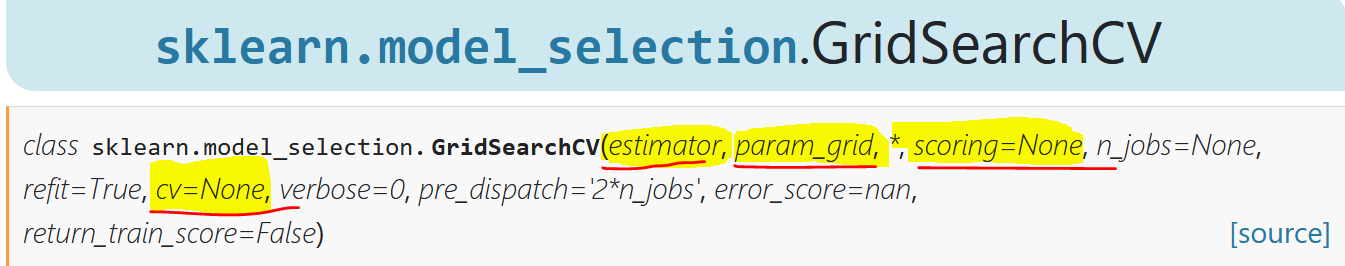

In [13]:
## What should be the right value for C and max_iter ??? --> Done with GridSearchCV
model = LogisticRegression()
model = GridSearchCV(estimator=model , param_grid=params , scoring = "f1" , cv=5)
model

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]},
                         {'max_iter': [100, 200, 300, 400]}],
             scoring='f1')

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]},
                         {'max_iter': [100, 200, 300, 400]}],
             scoring='f1')

In [16]:
print(model.param_grid)

[{'C': [0.0001, 0.01, 1, 100, 10000]}, {'max_iter': [100, 200, 300, 400]}]


In [17]:
print(model.get_params)
print(model.best_estimator_)

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]},
                         {'max_iter': [100, 200, 300, 400]}],
             scoring='f1')>
LogisticRegression(max_iter=200)


In [18]:
test_probability = model.predict_proba(x_test)
pd.DataFrame(test_probability).head()

,0,1
0,0.007939,0.992061
1,0.000433,0.999567
2,0.871366,0.128634
3,0.039718,0.960282
4,0.007119,0.992881


In [19]:
np.argmax(model.predict_proba(x_test) , axis=1)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [20]:
model.predict(x_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0])

In [21]:
model.score(x_test , y_test)

0.9723756906077348

In [22]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

In [23]:
y_predict = model.predict(x_test)
confusion_matrix(y_test , y_predict)

array([[50,  3],
       [ 2, 88]], dtype=int64)

In [24]:
tpr = (50/(50+2))
fpr = (3/(3+88))

threshold_point = (fpr,tpr)
print("Threshold point : ",threshold_point)

Threshold point :  (0.03296703296703297, 0.9615384615384616)


In [25]:
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        53
           1       0.97      0.98      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143



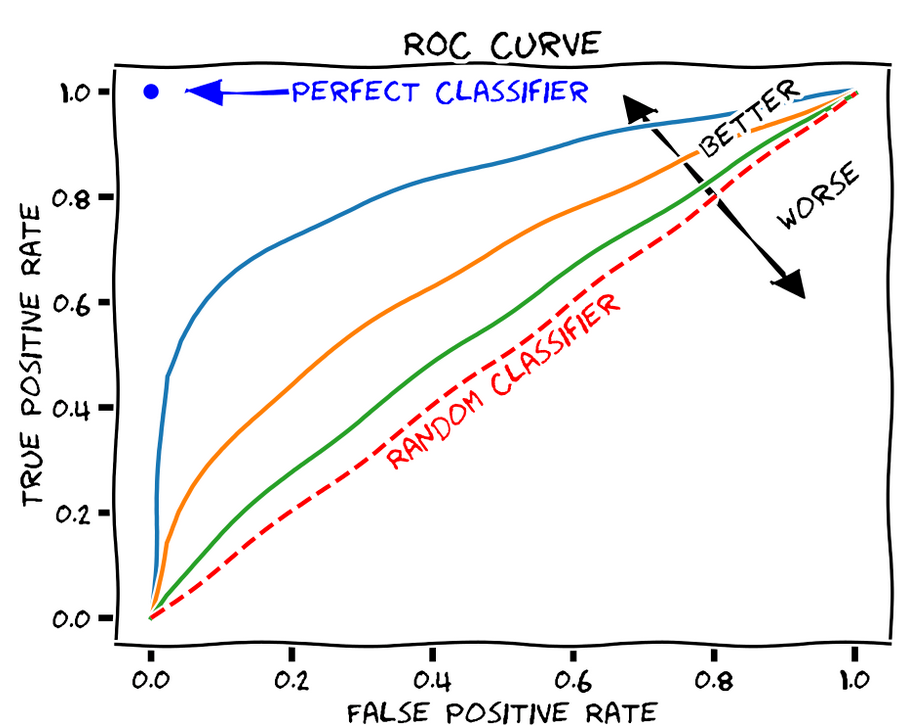

In [26]:
from sklearn.metrics import roc_auc_score,roc_curve

fpr, tpr, threshold = roc_curve(y_test , y_predict)
auc = roc_auc_score(y_test , y_predict)

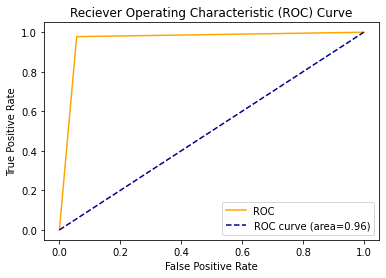

In [27]:
plt.plot(fpr, tpr, color='orange',label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='ROC curve (area=%0.2f)' % auc)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reciever Operating Characteristic (ROC) Curve")

plt.legend()
plt.show()

In [ ]:
## Determine the threhold from the above curve ????